# *Explanatory Data Analysis*

In [100]:
import numpy as np #library for numerical computing
import pandas as pd #library for data manipulation and analysis
import matplotlib.pyplot as plt #library for data visualization
import seaborn as sns #library for statistical data visualization

In [101]:
df = pd.read_csv('Data/train.csv') #read the data
df.head() #display the first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.info() #display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Column info:
```
Survived: Survival 0 --> no, 1--> yes
Pclass: Ticket Class 1--> 1st, 2-->2nd, 3-->3rd
Name: Passenger name
Sex: Gender 
Age: Age in years
Sibsp: number of siblings / spouses aboard the Titanic
Parch: Number of Parents / children aboard the Titanic
Ticket: Ticket Number
fare: Passenger fare
Cabin: Cabin Number
Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton
```

In [103]:
#check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
#check for duplicates
df.duplicated().sum()

0

In [105]:
#check for outliers
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


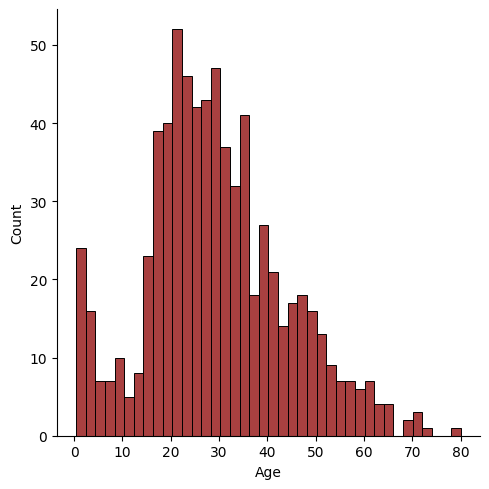

In [106]:
#checking the distribution of the Age column
sns.displot(df['Age'],kde=False,color='darkred',bins=40)
plt.show()

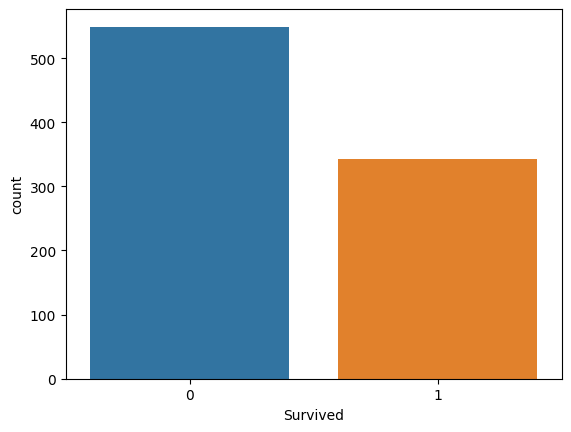

In [107]:
#checking differences survived and not survived
sns.countplot(x='Survived',data=df)
plt.show()

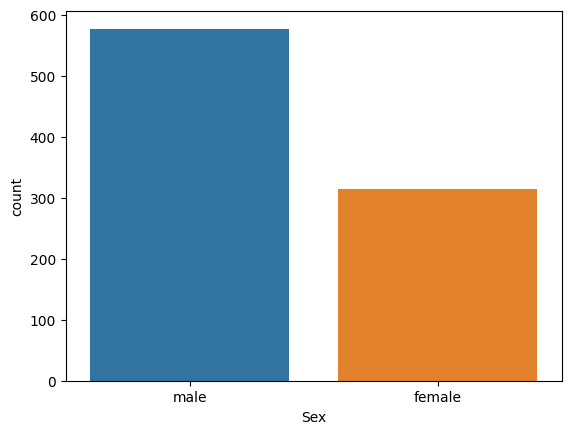

In [108]:
#checking gender differences
sns.countplot(x='Sex', data=df)
plt.show()

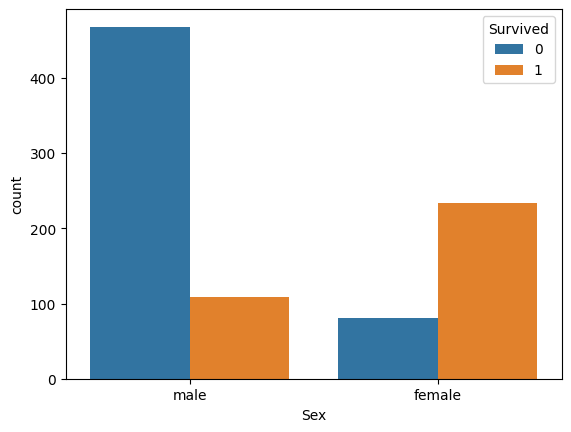

In [109]:
#checking differences between Gender and Survived
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

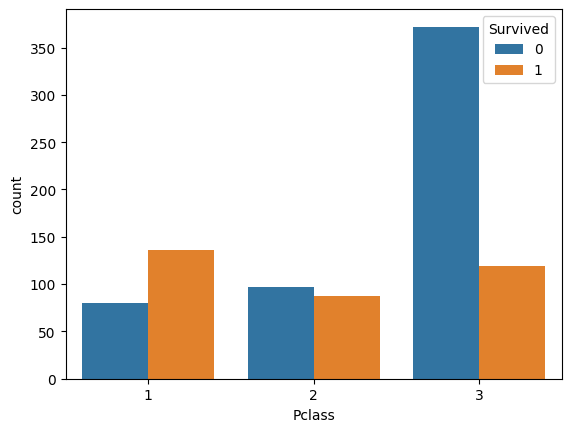

In [110]:
#checking how many people survived based on their class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

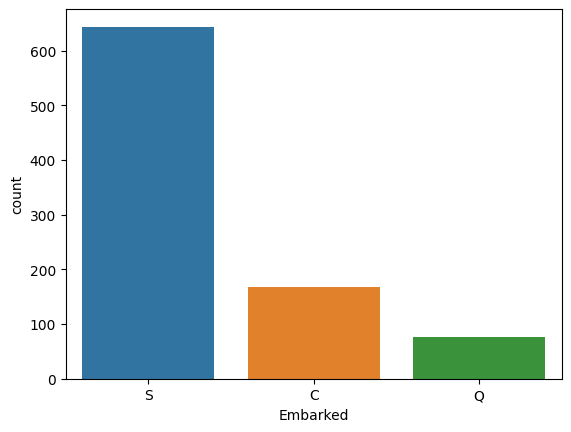

In [111]:
#checking the Embarked column
sns.countplot(x='Embarked', data=df)

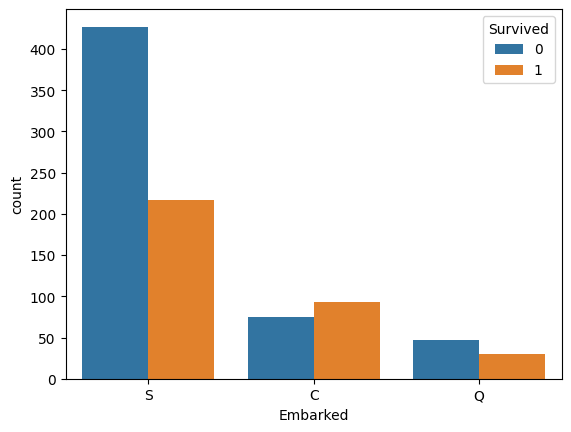

In [112]:
#checking the embarked column based on the survived column
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.show()

# *Data Cleaning*

<Axes: >

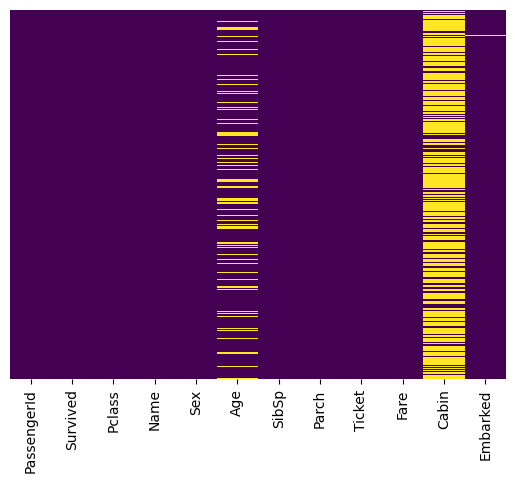

In [113]:
#checking nan values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### As we can see there are many nan values in _Cabin_ and _Age_ column. So I will drop _Cabin_ column and I will fill nan from Age column with mean of that column. Also I will delete nan values from other columns

In [114]:
#deleting the column Cabin
df.drop('Cabin',axis=1,inplace=True)

In [115]:
#filling the missing values in the Age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [116]:
#Dropping the nan values from the Embarked column
df.dropna(inplace=True)

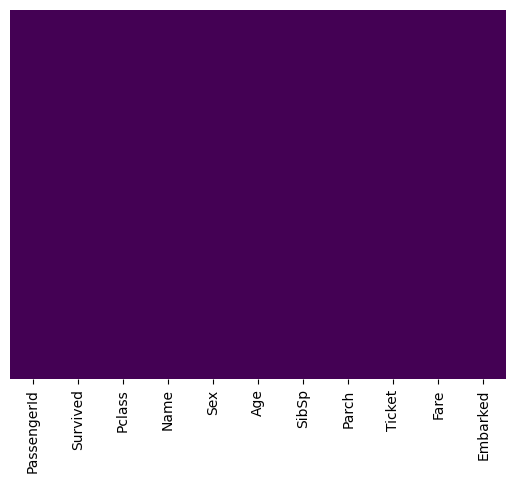

In [117]:
#checking the nan values again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [118]:
#checking the nan values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Column info:
```
Survived: Survival 0 --> no, 1--> yes
Pclass: Ticket Class 1--> 1st, 2-->2nd, 3-->3rd
Name: Passenger name
Sex: Gender 
Age: Age in years
Sibsp: number of siblings / spouses aboard the Titanic
Parch: Number of Parents / children aboard the Titanic
Ticket: Ticket Number
fare: Passenger fare
Cabin: Cabin Number
Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton
```

I will not use PassengerId, Name, Ticket, fare and Cabin columns for Machine Learning model

In [119]:
#dropping the column PassengerId
df.drop('PassengerId',axis=1,inplace=True)

In [120]:
#dropping the column Name
df.drop('Name',axis=1,inplace=True)

In [121]:
#dropping the column Ticket
df.drop('Ticket',axis=1,inplace=True)

In [122]:
#dropping the column Fare
df.drop('Fare',axis=1,inplace=True)

In [123]:
#rechecking the data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


### we need to convert the categorical data into numerical data. We can use get_dummies or map function.

In [124]:
#using map function to convert the categorical data into numerical data
gender = {'male': 1, 'female': 0}
df['Gender'] = df['Sex'].map(gender)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1


In [125]:
#Dropping Sex column
df.drop('Sex', axis=1, inplace=True)

In [126]:
#one hot encoding for Embarked column
df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1,False,False,True
1,1,1,38.0,1,0,0,True,False,False
2,1,3,26.0,0,0,0,False,False,True
3,1,1,35.0,1,0,0,False,False,True
4,0,3,35.0,0,0,1,False,False,True


In [127]:
#chenging true and false values to 1 and 0
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [128]:
#checking the data
df.head()

,Survived,Pclass,Age,SibSp,Parch,Gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,0,0,1,0,0
2,1,3,26.0,0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,0,1
4,0,3,35.0,0,0,1,0,0,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Gender      889 non-null    int64  
 6   Embarked_C  889 non-null    int32  
 7   Embarked_Q  889 non-null    int32  
 8   Embarked_S  889 non-null    int32  
dtypes: float64(1), int32(3), int64(5)
memory usage: 59.0 KB


In [130]:
#saving the data
df.to_csv('Data/train_cleaned.csv', index=False)